<a href="https://colab.research.google.com/github/ritikaapp8/Portfolio/blob/master/CV_Daria_Ritika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Files
import tensorflow as tf

In [ ]:
!nvidia-smi

Sat Feb 25 00:25:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
def pad_sequences(sequences, maxlen=None, dtype=np.float32,
                  padding='post', truncating='post', value=0.):
    '''Pads each sequence to the same length: the length of the longest
    sequence.
        If maxlen is provided, any sequence longer than maxlen is truncated to
        maxlen. Truncation happens off either the beginning or the end
        (default) of the sequence. Supports post-padding (default) and
        pre-padding.
        Args:
            sequences: list of lists where each element is a sequence
            maxlen: int, maximum length
            dtype: type to cast the resulting sequence.
            padding: 'pre' or 'post', pad either before or after each sequence.
            truncating: 'pre' or 'post', remove values from sequences larger
            than maxlen either in the beginning or in the end of the sequence
            value: float, value to pad the sequences to the desired value.
        Returns
            x: numpy array with dimensions (number_of_sequences, maxlen)
            lengths: numpy array with the original sequence lengths
    '''
    lengths = np.asarray([len(s) for s in sequences], dtype=np.int64)
    lengths = list(lengths)

    nb_samples = len(sequences)
    if maxlen is None:
        maxlen = np.max(lengths)

    # take the sample shape from the first non empty sequence
    # checking for consistency in the main loop below.
    sample_shape = tuple()
    for s in sequences:
        if len(s) > 0:
            sample_shape = np.asarray(s).shape[1:]
            break

    x = (np.ones((nb_samples, maxlen) + sample_shape) * value).astype(dtype)
    for idx, s in enumerate(sequences):
        if len(s) == 0:
            continue  # empty list was found
        if truncating == 'pre':
            trunc = s[-maxlen:]
        elif truncating == 'post':
            trunc = s[:maxlen]
        else:
            raise ValueError('Truncating type "%s" not understood' % truncating)

        # check `trunc` has expected shape
        trunc = np.asarray(trunc, dtype=dtype)
        if trunc.shape[1:] != sample_shape:
            raise ValueError('Shape of sample %s of sequence at position %s is different from expected shape %s' %
                             (trunc.shape[1:], idx, sample_shape))

        if padding == 'post':
            x[idx, :len(trunc)] = trunc
        elif padding == 'pre':
            x[idx, -len(trunc):] = trunc
        else:
            raise ValueError('Padding type "%s" not understood' % padding)
    return x, np.asarray(lengths)
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#import numpy as np
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())
#from keras import backend as K
seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
#import tensorflow as tf
#tf.random.set_seed(seed_value)
#gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.9)
#config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)
#sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))
#tf.compat.v1.keras.backend.set_session(sess)
import glob
import pandas as pd
#from keras.models import Sequential, Input, Model
#from keras.layers import Dense,Bidirectional
#from keras.layers import LSTM, GRU
#from keras.layers import Dropout, TimeDistributed, AveragePooling1D, Conv1D, MaxPooling1D, UpSampling1D,LayerNormalization,BatchNormalization
#from keras import optimizers
#from tcn import TCN
#from keras.layers import TimeDistributed,Bidirectional
#from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [ ]:
#!pip3 install colab

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'code analysis'  'Colab Notebooks'   normal   stroke


In [ ]:
#!pip3 install keras-tcn

In [ ]:
#!pip3 install --user keras-tcn

In [ ]:
#!pip3 install --user opencv-python

In [ ]:
#Drive
normal=[]
root='/content/drive/My Drive/normal'
for path, subdirs, files in os.walk(root):
    for name in files:
        normal.append(os.path.join(path, name))

In [ ]:
#The amount of normal pics
print(len(normal))

1000


In [ ]:
#normal

In [ ]:
#Path for stroke pics
stroke=[]
root='/content/drive/My Drive/stroke'
for path, subdirs, files in os.walk(root):
    for name in files:
        stroke.append(os.path.join(path, name))

In [ ]:
#amount of stroke pics
print(len(stroke))

507


In [ ]:
#stroke

In [ ]:
from PIL import Image
from numpy import asarray

In [ ]:
#Since you can't directly feed images to your model, you need to convert them into an array
stroke_array=[]
normal_array=[]
for i in range(len(stroke)):
    img = Image.open(stroke[i])
    stroke_array.append(asarray(img))
for i in range(len(normal)):
    img = Image.open(normal[i])
    normal_array.append(asarray(img))

In [ ]:
print(len(stroke_array))
print(len(normal_array))

In [ ]:
#Shapes for stroke weren't the same, while all the normal were
stroke_array[0].shape

(300, 221, 3)

In [ ]:
stroke_array[0].shape[0]

300

In [ ]:
stroke_array[0].shape[1]

221

In [ ]:
stroke_array[9].shape

(210, 150, 3)

In [ ]:
stroke_array[100].shape

(122, 91, 4)

In [ ]:
normal_array[49].shape

(256, 256, 3)

In [ ]:
#Wanted to find the distribution of x and y
#So shape of zero(x) will go to S1 list, while all shape of one(y) will go to S2 list
s1=[]
s2=[]
for i in range(len(stroke_array)):
    s1.append(stroke_array[i].shape[0])
    s2.append(stroke_array[i].shape[1])

In [ ]:
max(s1)
#trail and error for finding correct padding? -- maybe

894

In [ ]:
max(s2)

752

In [ ]:
min(s1)

66

In [ ]:
min(s2)

58

In [ ]:
from statistics import mean

In [ ]:
#Mean of x
mean(s1)

213.4181459566075

In [ ]:
#Mean of y
mean(s2)

203.42998027613413

In [ ]:
s1[0]

300

In [ ]:
#Since ave. of normal was 256, we decided to pad the x and y to be 256
#mean of s1 and s2 around 200 and s1[0] is 300 so want smthg in between. normal avergage is 256, so used that for everything
stroke_array_final=[]
for i in range(len(stroke_array)):
    l1=256-s1[i]
    l2=256-s2[i]
    if l1 <0:
        temp=stroke_array[i][0:256,:,:]
        l1=0
    if l2<0:
        temp=stroke_array[i][:,0:256,:]
        l2=0
    else:
        temp=stroke_array[i]
    stroke_array_final.append(np.pad(temp, pad_width=[(0, l1),(0, l2),(0, 0)], mode='constant'))

In [ ]:
#Found out that some had not RGB, the last dimension was not 3
stroke_array_final[100].shape

(256, 256, 4)

In [ ]:
stroke_array_final[80].shape

(300, 256, 3)

In [ ]:
stroke_array[80].shape

(300, 168, 3)

In [ ]:
stroke_array_final_new=[]
for i in range(len(stroke_array_final)):
    stroke_array_final_new.append(stroke_array_final[i][0:256,:,:])

In [ ]:
stroke_array_final_new[80].shape

(256, 256, 3)

In [ ]:
stroke_array=stroke_array_final_new

In [ ]:
print(len(stroke_array))
print(len(normal_array))

507
1000


In [ ]:
#This let us know how many did not have 3
ind1=[]
for i in range(len(stroke_array)):
    if (stroke_array[i].shape[2])!=3:
        ind1.append(i)
print(len(ind1))

64


In [ ]:
print(len(ind1))

64


In [ ]:
stroke_array[ind1[0]].shape

(256, 256, 4)

In [ ]:
stroke_array[ind1[0]].shape

(256, 256, 4)

In [ ]:
#This was to get rid of the ones that did not have 3
#4 isb&w but 3 is colored
for index in sorted(ind1,reverse=True):
    del stroke_array[index]

In [ ]:
ind1=[]
for i in range(len(normal_array)):
    if (normal_array[i].shape[2])!=3:
        ind1.append(i)
print(len(ind1))

0


In [ ]:
#Converted them into array again
stroke_array=np.array(stroke_array)
normal_array=np.array(normal_array)

In [ ]:
492 - 49

443

In [ ]:
print(stroke_array.shape)

(443, 256, 256, 3)


In [ ]:
print(normal_array.shape)

(1000, 256, 256, 3)


In [ ]:
#This was to create a label for them
#[1,0] for normal
#[0,1] for stroke
#One hot vector label
label_normal=[]
label_stroke=[]
for i in range(1000):
    label_normal.append([1,0])
label_normal=np.array(label_normal)
print(label_normal.shape)
for i in range(443):
    label_stroke.append([0,1])
label_stroke=np.array(label_stroke)
print(label_stroke.shape)

(1000, 2)
(443, 2)


In [ ]:
image_array=np.concatenate((stroke_array,normal_array))
label_array=np.concatenate((label_stroke,label_normal))

In [ ]:
#This is the features/input or image features
print(image_array.shape)
#This is the label
print(label_array.shape)

(1443, 256, 256, 3)
(1443, 2)


In [ ]:
#splitting them into training and testing data
#20% us test set since it's 0.2
#the remaining is training
image_train,image_test,label_train,label_test=train_test_split(image_array,label_array, test_size=0.2 ,random_state = 12)



In [ ]:
#Converting the labels into the right format for the model to take it
from matplotlib import pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import precision_recall_fscore_support,det_curve,recall_score,precision_score,f1_score,accuracy_score


In [ ]:
#Here we compute the class weights, because we had 1000 normal images and 500 stroke
#Since we had more normal than stroke, we commit classes, a mathmatical way to make sure the model learns perfectly
#We did this, so that the model is not bias, we added weights
label_train_final=[]
label_test_final=[]
for i in range(len(label_train)):
    if label_train[i][0]==1:
        label_train_final.append(1)
    else:
        label_train_final.append(0)
label_train_final=np.array(label_train_final)
l=label_train_final
labels=l
label_train_final=np.reshape(label_train_final,(label_train_final.shape[0],1))
class_weights=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(l),y=l)
class_weights=dict(zip(np.unique(l),class_weights))
for i in range(len(label_test)):
    if label_test[i][0]==1:
        label_test_final.append(1)
    else:
        label_test_final.append(0)
label_test_final=np.array(label_test_final)
label_test_final=np.reshape(label_test_final,(label_test_final.shape[0],1))

In [ ]:
#even though 80% was for test set, 10% was for validation
#so we really have 70% for test set

#Cov2D, convolution layers used to extract features from images
#MaxPooling, is to resample, downsample data
#Dropout, regalization technique
#Summary: this is basically a model which can process images in computer vision

#Loss function, is crossentropy
  #Crossentropy is a mathmatical function to measure two probability distributions
#Optimizer, backpropagation, is called adam
  #Optimizers goal is to help you find the best set of weights and bias for training the network

#Here we're also training for 10 epochs
#Batches...
#Validation is to find the best model , than you save the best model to the name(filepath)
batch_size, x, y,z = None, None, None,3
i = tf.keras.Input(batch_shape=(batch_size, x,y,z))
o=tf.keras.layers.Conv2D(20, 30, activation='relu')(i)
o=tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(o)
o=tf.keras.layers.Dropout(0.25)(o)
o=tf.keras.layers.Conv2D(20, 20, activation='relu')(o)
o=tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(o)
o=tf.keras.layers.LayerNormalization()(o)
o=tf.keras.layers.GlobalAveragePooling2D()(o)
o=tf.keras.layers.Flatten()(o)
o=tf.keras.layers.Dense(units=64, activation='tanh')(o)
o=tf.keras.layers.Dense(units=1, activation='sigmoid')(o)
m = tf.keras.Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')
filepath="image_model1.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint] 
print(m.summary())
History = m.fit(image_train, label_train_final, epochs=10, callbacks=callbacks_list, validation_split=.1,batch_size=50,class_weight=class_weights)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 20)    54020     
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 20)   0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, None, None, 20)    0         
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 20)    160020    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 20)   0         
 2D)                                                         

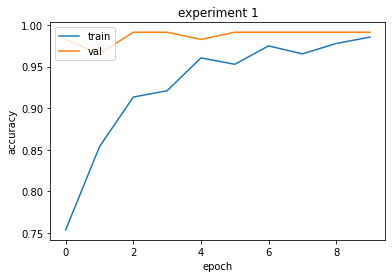

In [ ]:
#Our training accuracy and validation accuracy with the function of epoch
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('experiment 1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
model=tf.keras.models.load_model('image_model1.hdf5')

In [ ]:
#Loading our best model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 20)    54020     
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 20)   0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, None, None, 20)    0         
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 20)    160020    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 20)   0         
 2D)                                                         

In [ ]:
#After we load our best model, we predict our test set
pred=model.predict(image_test)

10/10 [==============================] - 1s 24ms/step


In [ ]:
print(len(pred))

289


In [ ]:
pred[0].item()

0.8224018216133118

In [ ]:
print(len(label_test_final))

289


In [ ]:
label_test_final[0].item()

1

In [ ]:
#Then you compare your test prediction with the ground truth
c=0
for i in range(len(pred)):
    if pred[i].item()>=0.5:
        l=1
    else:
        l=0
    if label_test_final[i].item()==l:
        c=c+1

In [ ]:
#Then calculate the accuracy
acc=(c/len(label_test_final))*100

In [ ]:
print(acc)

96.53979238754326
